# Computational Social Science Project #3 

*Group number:* 7

*Group members:* Kamaljit Gill, Annette Gailliot, Wan Nurul Naszeerah

*Semester:* Fall 2022

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# Make sure to import other libraries that will be necessary for training models!
from sklearn.model_selection import train_test_split


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                      low_memory=False)

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

## Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

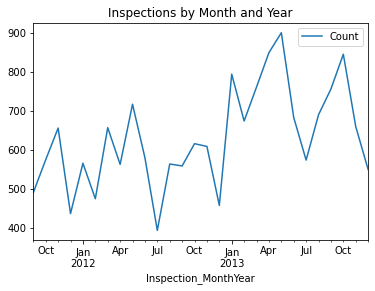

In [7]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

What do the results look like? 

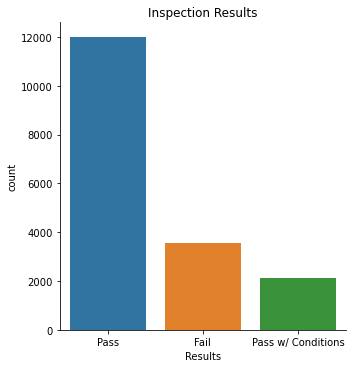

In [8]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

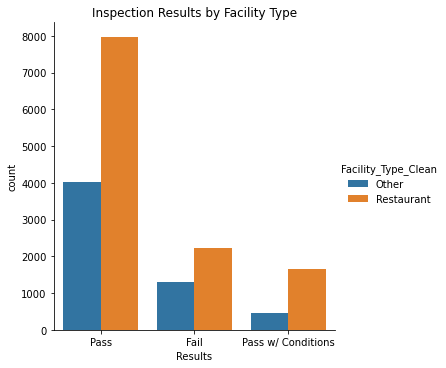

In [9]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [10]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [11]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [12]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## Fit Models

### Model 1

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

In [ ]:
#Annette - SVM

Support Vector Classification models classify data into groups by sorting them based on their location relative to a separating hyperplane. The optimization problem is to create the largest margin separating groups relative to the separating hyperplane. 

SVMs are useful when there is high sparsity in the data, and SVMs are robust to outliers. 

In [13]:
from sklearn.svm import SVC

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

In [75]:
from sklearn.model_selection import GridSearchCV

# create a model
svm = SVC(probability=True)

# defining parameter range
SVM_param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': ['auto'],
              'kernel': ['rbf']} 
  
SVM_grid = GridSearchCV(SVC(), SVM_param_grid, refit = True, verbose = 3)

# fitting the model for grid search
SVM_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.798 total time= 1.2min
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.798 total time= 1.2min
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.798 total time= 1.2min
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.798 total time= 1.2min
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.799 total time= 1.1min
[CV 1/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.854 total time= 1.1min
[CV 2/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.849 total time= 1.1min
[CV 3/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.853 total time= 1.1min
[CV 4/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.847 total time= 1.2min
[CV 5/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.858 total time=12.5min
[CV 1/5] END ......C=10, gamma=auto, kernel=rbf;, score=0.915 total time= 6.6min
[CV 2/5] END ......C=10, gamma=auto, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ['rbf']},
             verbose=3)

In [76]:
best_SVM_index = np.argmax(SVM_grid.cv_results_["mean_test_score"])
best_SVM_pred = SVM_grid.best_estimator_.predict(X_test)

print(SVM_grid.cv_results_["params"][best_SVM_index])
print('Validation Accuracy', accuracy_score(best_SVM_pred, y_test))

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Accuracy 0.9177277179236043


In [78]:
# create a model
svm = SVC(C=100, gamma='auto', kernel = 'rbf', probability=True)

# fit the model
svm_model = svm.fit(X_train, y_train.flatten())

## Model 2

In [ ]:
#Need to add in discussion of logistic models

In [55]:
#Kamal - Logistic
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#create a model
log_reg = LogisticRegression(max_iter=500)
#Data Splitting

#Fit the model - Taken from 3-1 Classification Hyperparameter Tuning
log_model = log_reg.fit(X_train, y_train.ravel())
y_pred = log_model.predict(X_test)

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
            'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

#Hyperparameter Tuning - understand parameters
log_reg.get_params()
log_grid_reg = GridSearchCV(log_reg, param_grid, cv=3)
log_grid = GridSearchCV(log_model, param_grid, cv=3)
log_grid.fit(X_train, y_train)
best_index = np.argmax(log_grid.cv_results_["mean_test_score"])
best_log_pred = log_grid.best_estimator_.predict(X_test)

print(log_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_log_pred, y_test))


####

{'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.9193601044727392


## Model 3

In [ ]:
#Need to add in discussion of Random Forest Models

In [70]:
#Wan Random Forest
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or ‘entropy’ for information gain
                       splitter='best',  # or ‘random’ for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 5) #random seed

dt_classifier.fit(X_train, y_train)

scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
scores
scores.mean()

dt_classifier.score(X_test, y_test)

#precision = cross_val_score(dt_classifier, X_train, y_train, cv=3, scoring='precision')
#recall = cross_val_score(dt_classifier, X_train, y_train, cv=3, scoring='recall')
#accuracy = cross_val_score(dt_classifier, X_train, y_train, cv=3, scoring='accuracy')
#f1 = cross_val_score(dt_classifier, X_train, y_train, cv=3, scoring=‘f1’)

0.9085863532484493

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [80]:
# Loop through each model to report Accuracy
for clf, label in zip([log_model, 
                       dt_classifier,
                        svm_model], ['Logistic Regression', 
                                            'Decision Tree',
                                    'SVM']):
        accuracy = cross_val_score(clf, X, y.ravel(), scoring='accuracy', cv=5)
        print('Accuracy: %0.2f [%s]' % (scores.mean(), label))
        precision = cross_val_score(clf, X, y.ravel(), scoring='precision', cv=5)
        print('Precision: %0.2f [%s]' % (precision.mean(), label))
        recall = cross_val_score(clf, X, y.ravel(), scoring='recall', cv=5)
        print('Recall: %0.2f [%s]' % (recall.mean(), label))
        f1 = cross_val_score(clf, X, y.ravel(), scoring='f1', cv=5)
        print('F1: %0.2f [%s]' % (f1.mean(), label))

Accuracy: 0.91 [Logistic Regression]
Precision: 0.79 [Logistic Regression]
Recall: 0.80 [Logistic Regression]
F1: 0.80 [Logistic Regression]
Accuracy: 0.91 [Decision Tree]
Precision: 0.77 [Decision Tree]
Recall: 0.77 [Decision Tree]
F1: 0.77 [Decision Tree]
Accuracy: 0.91 [SVM]
Precision: 0.75 [SVM]
Recall: 0.87 [SVM]
F1: 0.80 [SVM]


Which of these metrics would you want to prioritize when conducting pre-dictive auditing in this context? Why?

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

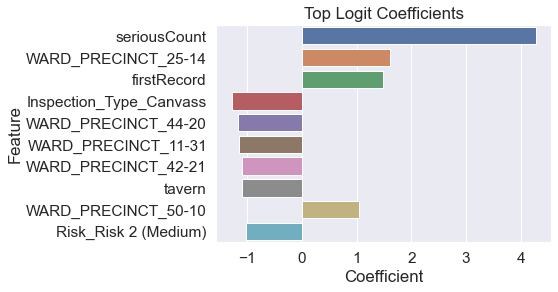

In [68]:
logit_data = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(log_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

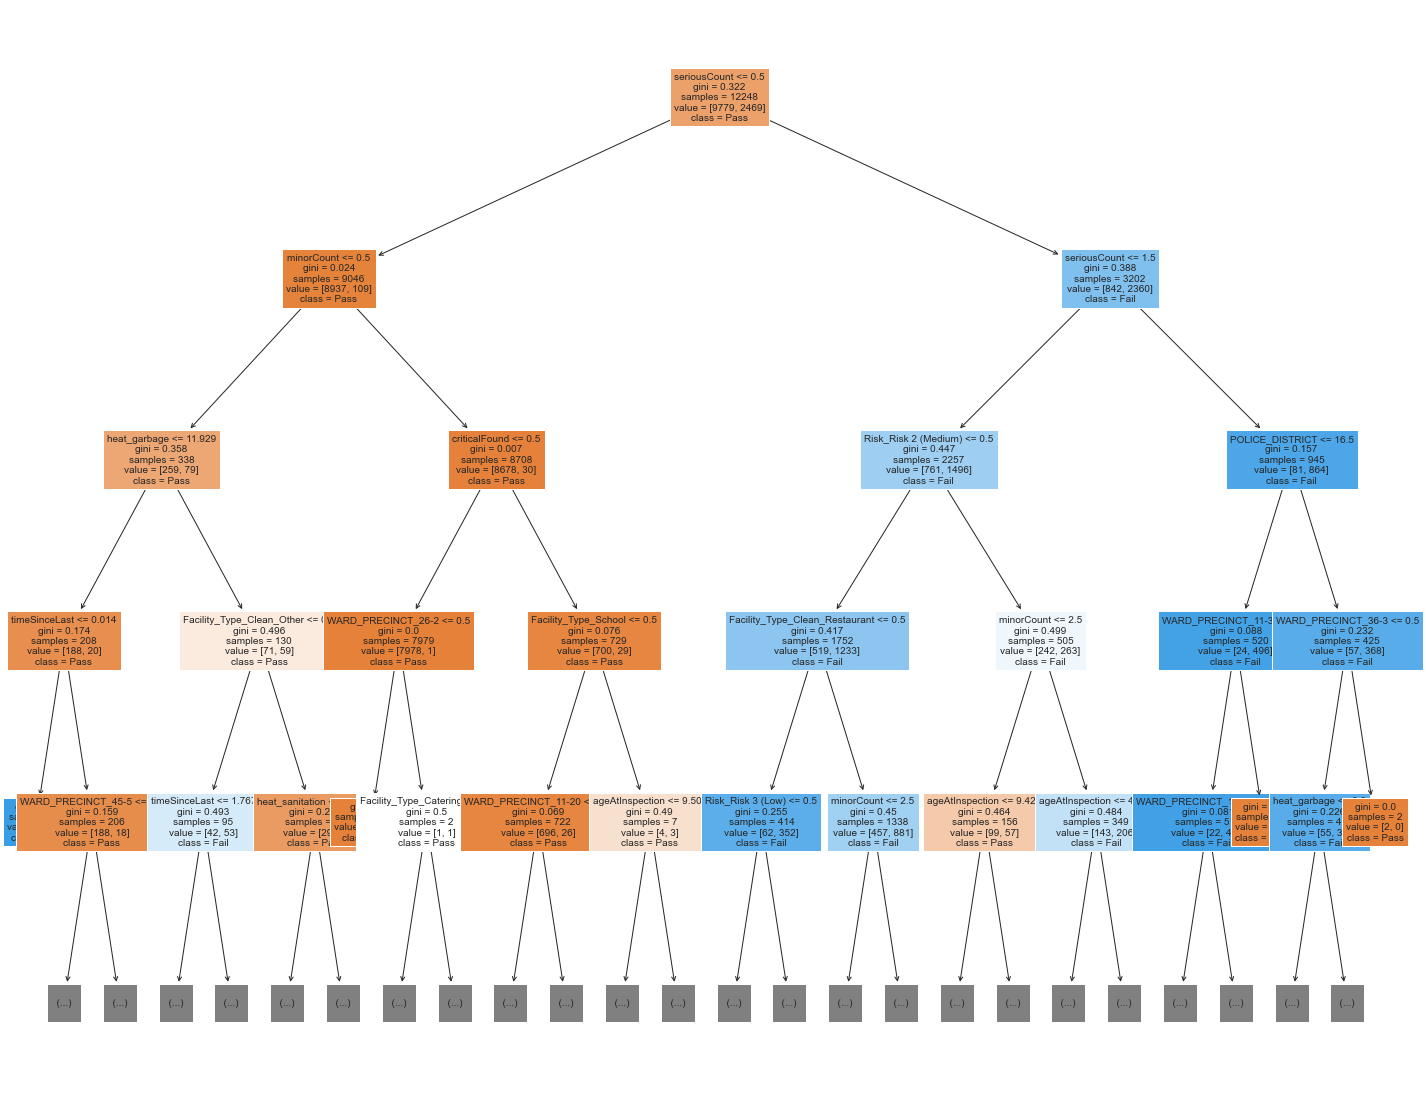

In [69]:
# Decision tree on the whole dataset to get feature importances

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier,
                   feature_names=X.columns,
                   class_names=['Pass', 'Fail'],
                   filled=True,
                  fontsize = 10,
                  max_depth = 4)

In [ ]:
#Can't do feature importance plots for non-linear kernel SVM. Provide a confusion matrix instead

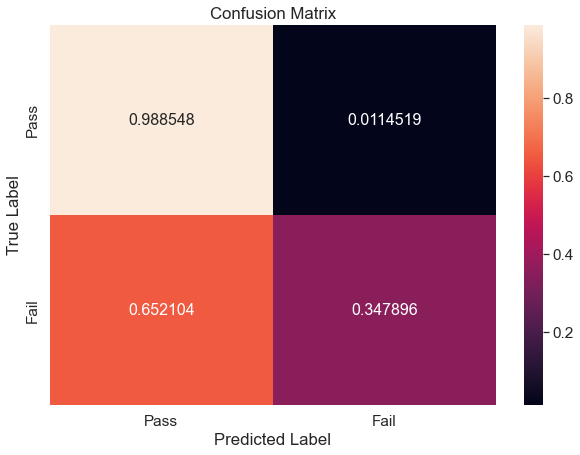

In [45]:
cf_matrix = confusion_matrix(y_test, best_SVM_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

In [82]:
#best_SVM_pred = SVM_grid.best_estimator_.predict(X_test)
#best_SVM_proba = SVM_grid.best_estimator_.predict_proba(X_test)

In [189]:
#get probability of Fail
audit_prob = pd.DataFrame(np.asmatrix(log_model.predict_proba(X_test)), index=X_test.index)
audit_prob = audit_prob.rename(columns={0: "ProbPass", 1: "ProbFail"})

#Get predicted Fail
audit_pred = pd.DataFrame(log_model.predict(X_test), index=X_test.index)
audit_pred = audit_pred.rename(columns={0: "PredFail"})

#Get actual Fail
actual = pd.DataFrame(y_test, index=X_test.index)
actual = actual.rename(columns={0:"Fail"})

#Make dataset combining these values
audit = pd.concat([actual, audit_prob, audit_pred], axis=1)
audit

,,Fail,ProbPass,ProbFail,PredFail
Inspection_ID,DBA_Name,,,,
1084235,PAPI'S TACOS,0,0.981416,0.018584,0
1285639,ZACATECAS RESTAURANT,0,0.970403,0.029597,0
1329252,LUKE'S BEEF & PIZZA,0,0.975693,0.024307,0
1198487,WITTS,1,0.000435,0.999565,1
1372271,WALGREENS #3072,0,0.965872,0.034128,0
...,...,...,...,...,...
1166266,G N P H #NINE INC,0,0.978173,0.021827,0
1329287,THE PORTAGE,0,0.988862,0.011138,0
1098269,"A KARRASEL NURSERY SCHOOL AND KINDERGARTEN, INC.",0,0.968473,0.031527,0


In [191]:
#Take the 1000 riskiest
audit_t1000 = audit.sort_values(by=['ProbFail'], ascending=False)[:1000]
audit_t1000

,,Fail,ProbPass,ProbFail,PredFail
Inspection_ID,DBA_Name,,,,
1335907,DELUXE DINER,1,9.770406e-07,0.999999,1
1369844,NEW CHINA BUFFET ENTERPRISES,1,9.940543e-07,0.999999,1
1106796,SYDNEY MAROVITZ GOLF COURSE,1,1.072110e-06,0.999999,1
1174311,"LA NUEVA IMAGEN GROCERY, INC.",1,1.256502e-06,0.999999,1
1361272,MERKLE'S BAR & GRILL,1,1.399658e-06,0.999999,1
...,...,...,...,...,...
537649,CYC DOROTHY GAUTREAUX,0,9.548384e-01,0.045162,0
1305369,POLISH HIGHLANDERS ALLIANCE,0,9.549286e-01,0.045071,0
1286228,MC KINNEY'S EARLY LEARNING ACADEMY,0,9.552820e-01,0.044718,0


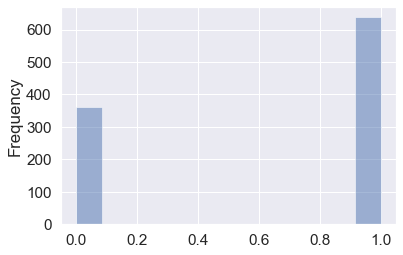

In [195]:
#Plot prediction of 1,000 riskiest
ax = audit_t1000['PredFail'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:xlabel='ProbFail', ylabel='Fail'>

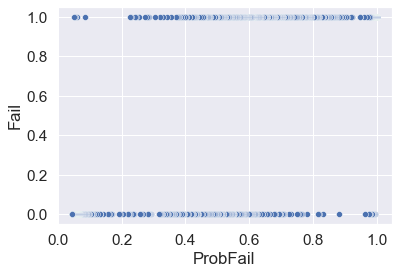

In [196]:
sns.scatterplot(data=audit_t1000.reset_index(), x="ProbFail", y="Fail")

In [200]:
#get probability of Fail on whole dataset
audit_prob_full = pd.DataFrame(np.asmatrix(log_model.predict_proba(X)), index=X.index)
audit_prob_full = audit_prob_full.rename(columns={0: "ProbPass", 1: "ProbFail"})

#Get predicted Fail
audit_pred_full = pd.DataFrame(log_model.predict(X), index=X.index)
audit_pred_full = audit_pred_full.rename(columns={0: "PredFail"})

#Get actual Fail 
actual = pd.DataFrame(y, index=X.index)
actual = actual.rename(columns={0: "Fail"})

#Make dataset combining these values
audit_full = pd.concat([actual, audit_prob_full, audit_pred_full], axis=1)
audit_full


,,Fail,ProbPass,ProbFail,PredFail
Inspection_ID,DBA_Name,,,,
269961,SEVEN STAR,0,0.936838,0.063162,0
507211,PANERA BREAD,0,0.984063,0.015937,0
507212,LITTLE QUIAPO RESTAURANT,1,0.008417,0.991583,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0.966913,0.033087,0
507219,TARGET STORE # T-2079,1,0.017391,0.982609,1
...,...,...,...,...,...
1393258,CIAO BELLA CAFE,0,0.976548,0.023452,0
1395218,Christian Fields Style Bar,0,0.992046,0.007954,0
1395224,W CHICAGO - LAKESHORE,0,0.000250,0.999750,1


In [201]:
#Take a random 1,000 of the full dataset
audit_full_1000 = audit_full.sample(n=1000, random_state=1)
audit_full_1000

,,Fail,ProbPass,ProbFail,PredFail
Inspection_ID,DBA_Name,,,,
659505,PARKVIEW VILLA INC,1,0.945628,0.054372,0
659381,FRESH MARKET PLACE,0,0.987527,0.012473,0
1326515,POLK & WESTERN INC,0,0.984113,0.015887,0
1372238,HUB 51 / SUB 51,0,0.985097,0.014903,0
1151795,Churro Factory Inc,0,0.618971,0.381029,0
...,...,...,...,...,...
1296428,ROUTE 66 PIZZA,0,0.982656,0.017344,0
547817,MARATHON,1,0.173831,0.826169,1
1084391,DEL CAMPOS RESTAURANT,0,0.965646,0.034354,0


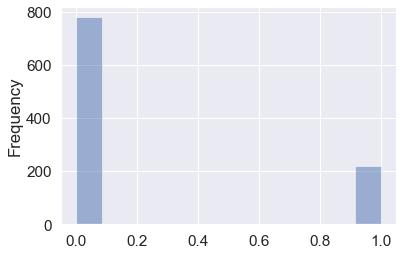

In [202]:
#Plot prediction of random 1,000 from the full sample
#The logit model performs better than a random model!
ax = audit_full_1000['PredFail'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot:xlabel='ProbFail', ylabel='Fail'>

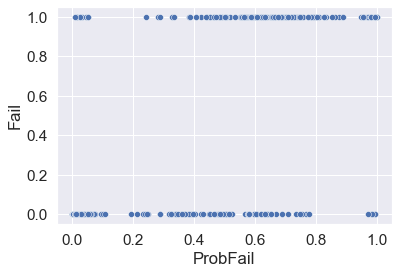

In [203]:
sns.scatterplot(data=audit_full_1000.reset_index(), x="ProbFail", y="Fail")

### Predict on Data with Unseen Labels

In [279]:
## I couldn't get our exact previous Logistic model to run because 
# the 2014 data does not have all the same feautures as the training dataset.
# So, I reran our old models just on the features that are in common between the datasets. 

#create a model
log_reg = LogisticRegression(max_iter=500)
#Data Splitting

#Fit the model - Taken from 3-1 Classification Hyperparameter Tuning
log_model = log_reg.fit(X_train[chicago_inspections_2014.columns & X_test.columns], y_train.ravel())

In [282]:
# Fill in the code below with the X data you used for training
X_validate = chicago_inspections_2014[chicago_inspections_2014.columns & X_test.columns].dropna()

In [283]:
#get probability of Fail on Validation
valid_prob = pd.DataFrame(np.asmatrix(log_model.predict_proba(X_validate)))
valid_prob = valid_prob.rename(columns={0: "ProbPass", 1: "ProbFail"})

#Get predicted Fail on Validation
valid_pred = pd.DataFrame(log_model.predict(X_validate))
valid_pred = valid_pred.rename(columns={0: "PredFail"})

#Make dataset combining these values
valid_full = pd.concat([valid_prob, valid_pred], axis=1)
valid_full

,ProbPass,ProbFail,PredFail
0,0.986182,0.013818,0
1,0.974668,0.025332,0
2,0.246016,0.753984,1
3,0.009496,0.990504,1
4,0.506332,0.493668,0
...,...,...,...
3933,0.975063,0.024937,0
3934,0.975172,0.024828,0
3935,0.973620,0.026380,0
3936,0.983615,0.016385,0


In [286]:
#!pwd
valid_full['PredFail'].to_csv('predictions.csv')